In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import time
import pandas as pd




In [ ]:
!unzip '/content/drive/MyDrive/CNN/more BrainTumor/archive.zip' -d '/content/drive/MyDrive/CNN/more BrainTumor'

In [2]:
def open(PATH):
  img = Image.open(PATH)
  img = img.resize([64,64])
  img = ImageOps.grayscale(img)
  img = np.array(img)
  img = img/255
  return img

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CNN/BrainTumor/brain tumor dataset/data.csv')
df.head(5)

,path,label
0,braintumor/pic2802.jpg,1
1,braintumor/pic2027.jpg,0
2,braintumor/pic1814.jpg,0
3,braintumor/pic3438.jpg,1
4,braintumor/pic4298.jpg,1


In [3]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


In [4]:
#load img: Training
X = []
y = []
n = 0
for sets in range(1584):
  imgpath = n + 10
  try:
    img = open(f'/content/drive/MyDrive/CNN/more BrainTumor/Training/notumor/Tr-no_00{imgpath}.jpg')
  except FileNotFoundError:
    try:
      img = open(f'/content/drive/MyDrive/CNN/more BrainTumor/Training/notumor/Tr-no_0{imgpath}.jpg')
    except FileNotFoundError:
      img = open(f'/content/drive/MyDrive/CNN/more BrainTumor/Training/notumor/Tr-no_{imgpath}.jpg')
  X.append(img)
  y.append(0)
  n+=1
n = 0

for sets in range(1310):
  imgpath = n + 10
  try:
    img = open(f'/content/drive/MyDrive/CNN/more BrainTumor/Training/glioma/Tr-gl_00{imgpath}.jpg')
  except FileNotFoundError:
    try:
      img = open(f'/content/drive/MyDrive/CNN/more BrainTumor/Training/glioma/Tr-gl_0{imgpath}.jpg')
    except FileNotFoundError:
      img = open(f'/content/drive/MyDrive/CNN/more BrainTumor/Training/glioma/Tr-gl_{imgpath}.jpg')
  X.append(img)
  y.append(1)
  n+=1
n = 0

for sets in range(1328):
  imgpath = n + 10
  try:
    img = open(f'/content/drive/MyDrive/CNN/more BrainTumor/Training/meningioma/Tr-me_00{imgpath}.jpg')
  except FileNotFoundError:
    try:
      img = open(f'/content/drive/MyDrive/CNN/more BrainTumor/Training/meningioma/Tr-me_0{imgpath}.jpg')
    except FileNotFoundError:
      img = open(f'/content/drive/MyDrive/CNN/more BrainTumor/Training/meningioma/Tr-me_{imgpath}.jpg')
  X.append(img)
  y.append(2)
  n+=1
n = 0

for sets in range(1446):
  imgpath = n + 10
  try:
    img = open(f'/content/drive/MyDrive/CNN/more BrainTumor/Training/pituitary/Tr-pi_00{imgpath}.jpg')
  except FileNotFoundError:
    try:
      img = open(f'/content/drive/MyDrive/CNN/more BrainTumor/Training/pituitary/Tr-pi_0{imgpath}.jpg')
    except FileNotFoundError:
      img = open(f'/content/drive/MyDrive/CNN/more BrainTumor/Training/pituitary/Tr-pi_{imgpath}.jpg')
  X.append(img)
  y.append(3)
  n+=1
n = 0

In [5]:
#load img: Testing

n = 0
for sets in range(393):
  imgpath = n + 10
  try:
    img = open(f'/content/drive/MyDrive/CNN/more BrainTumor/Testing/notumor/Te-no_00{imgpath}.jpg')
  except FileNotFoundError:
    img = open(f'/content/drive/MyDrive/CNN/more BrainTumor/Testing/notumor/Te-no_0{imgpath}.jpg')
  X.append(img)
  y.append(0)
  n+=1
n = 0

for sets in range(288):
  imgpath = n + 10
  try:
    img = open(f'/content/drive/MyDrive/CNN/more BrainTumor/Testing/glioma/Te-gl_00{imgpath}.jpg')
  except FileNotFoundError:
    img = open(f'/content/drive/MyDrive/CNN/more BrainTumor/Testing/glioma/Te-gl_0{imgpath}.jpg')
  X.append(img)
  y.append(1)
  n+=1
n = 0

for sets in range(288):
  imgpath = n + 10
  try:
    img = open(f'/content/drive/MyDrive/CNN/more BrainTumor/Testing/meningioma/Te-me_00{imgpath}.jpg')
  except FileNotFoundError:
    img = open(f'/content/drive/MyDrive/CNN/more BrainTumor/Testing/meningioma/Te-me_0{imgpath}.jpg')
  X.append(img)
  y.append(2)
  n+=1
n = 0

for sets in range(288):
  imgpath = n + 10
  try:
    img = open(f'/content/drive/MyDrive/CNN/more BrainTumor/Testing/pituitary/Te-pi_00{imgpath}.jpg')
  except FileNotFoundError:
    img = open(f'/content/drive/MyDrive/CNN/more BrainTumor/Testing/pituitary/Te-pi_0{imgpath}.jpg')
  X.append(img)
  y.append(3)
  n+=1
n = 0
X = np.array(X)
y = np.array(y)

In [7]:
print(len(X))

6925


In [6]:


y = tf.keras.utils.to_categorical(y, 4)


from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest =  train_test_split(X,y,test_size=0.2, random_state=10)

Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')
Xtrain /= 255
Xtest /= 255


[0. 0. 1. 0.]


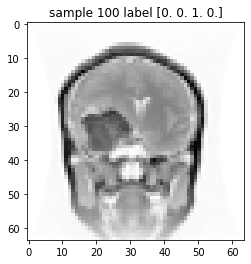

In [7]:

def display_sample(num):
    
    print(ytrain[num])  
    
    label = ytrain[num]
    
    image = Xtrain[num]
    plt.title(f'sample {num} label {label}')
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(100)

In [10]:
print(ytrain)
#i got paranoid so idk

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [8]:
from tensorflow.keras import backend as K

if K.image_data_format() == 'channels_first':
    Xtrain = Xtrain.reshape(Xtrain.shape[0], 1, 64, 64)
    Xtest = Xtest.reshape(Xtest.shape[0], 1, 64, 64)
    input_shape = (1, 64, 64)
else:
    Xtrain = Xtrain.reshape([Xtrain.shape[0], 64, 64, 1])
    Xtest = Xtest.reshape([Xtest.shape[0], 64, 64, 1])
    input_shape = (64, 64, 1)
    


In [43]:
def build_CNN():
  model = Sequential()
  model.add(Conv2D(64, kernel_size=(3,3), padding='same', input_shape=input_shape))

  model.add(Conv2D(128, (3, 3), activation='relu'))

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), activation='relu'))

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Dropout(0.25))

  model.add(Flatten())

  model.add(Dense(32, activation='relu'))

  model.add(Dropout(0.5))

  model.add(Dense(4, activation='softmax'))
  model.summary()
  return model

In [44]:
BTCNN = build_CNN()
opt = tf.keras.optimizers.Adam(learning_rate=2e-4)

BTCNN.compile(
    loss = 'categorical_crossentropy',
    optimizer = opt,
    metrics = ['accuracy']
  )

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 64, 64, 64)        640       
                                                                 
 conv2d_37 (Conv2D)          (None, 62, 62, 128)       73856     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 31, 31, 128)      0         
 g2D)                                                            
                                                                 
 dropout_45 (Dropout)        (None, 31, 31, 128)       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 29, 29, 64)        73792     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                

In [ ]:
!pip3 install keras-visualizer

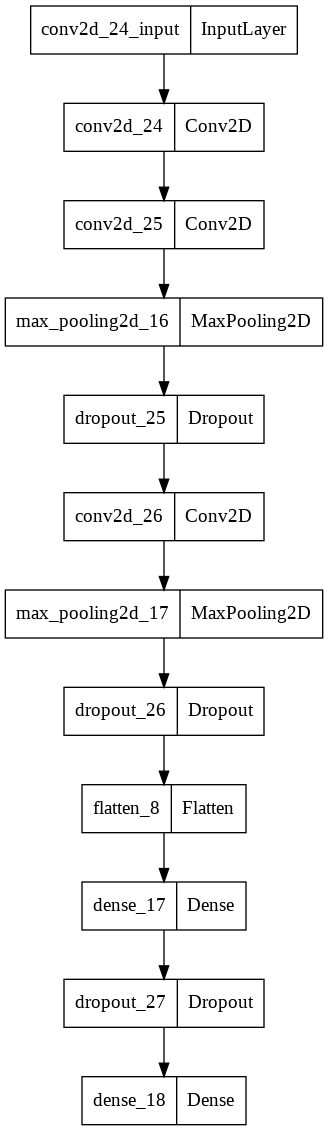

In [33]:
from tensorflow.keras.utils import plot_model
plot_model(BTCNN, 'visual.png')


In [45]:
BTCNN.fit(Xtrain, ytrain, batch_size=128, epochs=100, verbose=2, validation_data=(Xtest,ytest))

Epoch 1/100
44/44 - 7s - loss: 1.3843 - accuracy: 0.2843 - val_loss: 1.3822 - val_accuracy: 0.2845 - 7s/epoch - 163ms/step
Epoch 2/100
44/44 - 6s - loss: 1.3806 - accuracy: 0.2843 - val_loss: 1.3783 - val_accuracy: 0.2845 - 6s/epoch - 140ms/step
Epoch 3/100
44/44 - 6s - loss: 1.3350 - accuracy: 0.3240 - val_loss: 1.2218 - val_accuracy: 0.4823 - 6s/epoch - 140ms/step
Epoch 4/100
44/44 - 6s - loss: 1.1414 - accuracy: 0.5191 - val_loss: 1.0980 - val_accuracy: 0.4693 - 6s/epoch - 140ms/step
Epoch 5/100
44/44 - 6s - loss: 1.0191 - accuracy: 0.6005 - val_loss: 0.8893 - val_accuracy: 0.6888 - 6s/epoch - 146ms/step
Epoch 6/100
44/44 - 6s - loss: 0.9488 - accuracy: 0.6319 - val_loss: 0.8313 - val_accuracy: 0.6982 - 6s/epoch - 141ms/step
Epoch 7/100
44/44 - 6s - loss: 0.9106 - accuracy: 0.6433 - val_loss: 0.7817 - val_accuracy: 0.7408 - 6s/epoch - 141ms/step
Epoch 8/100
44/44 - 6s - loss: 0.8896 - accuracy: 0.6560 - val_loss: 0.7519 - val_accuracy: 0.7386 - 6s/epoch - 142ms/step
Epoch 9/100
44/4

In [47]:
from tensorflow.python.keras.callbacks import History
History()

In [48]:
print("Evaluate on test data")
results = BTCNN.evaluate(Xtest, ytest, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
11/11 [==============================] - 1s 48ms/step - loss: 0.2845 - accuracy: 0.8881
test loss, test acc: [0.2845197319984436, 0.8880866169929504]


In [63]:
print("Generate predictions for 3 samples")
predictions = BTCNN.predict(Xtest[:1])
type(Xtest)
print("predictions shape:", predictions.shape)
predictions

Generate predictions for 3 samples
predictions shape: (1, 4)


array([[7.794247e-05, 8.806976e-01, 1.191719e-01, 5.257521e-05]],
      dtype=float32)

In [58]:
BTCNN.save('/content/drive/MyDrive/CNN/BrainTumor')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CNN/BrainTumor/assets
